# Exploratory Data Analysis (EDA) with Pandas in Banking

The purpose of this project is to master the exploratory data analysis (EDA) in banking with Pandas framework.

Goals of the Project:

Explore a banking dataset with Pandas framework.
Build pivot tables.
Visualize the dataset with various plot types.

Importing the libraries necessary for this project. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

# Dataset exploration
In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [6]:
df = pd.read_csv(r'C:\Users\neels\Downloads\bank-additional (1).csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# Let's look at the dataset size, feature names and their types

In [7]:
df.shape
df.tail(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


The dataset contains 41188 objects (rows), for each of which 21 features are set (columns), including 1 target feature (y).

Attributing information
Output the column (feature) names:

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

* age - client's age in years (numeric)
* job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
* marital - marital status (categorical: divorced, married, single, unknown)
* education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
* default - has credit in default? (categorical: no, yes, unknown)
* housing - has housing loan? (categorical: no, yes, unknown)
* loan - has personal loan? (categorical: no, yes, unknown)
* contact - contact communication type (categorical: cellular, telephone)
* month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
* day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
* duration - last contact duration, in seconds (numeric).
* campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
* pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
* previous - number of contacts performed for this client before this campaign (numeric)
* poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
* emp.var.rate - employment variation rate, quarterly indicator (numeric)
* cons.price.idx - consumer price index, monthly indicator (numeric)
* cons.conf.idx - consumer confidence index, monthly indicator (numeric)
* euribor3m - euribor 3 month rate, daily indicator (numeric)
* nr.employed - number of employees, quarterly indicator (numeric)
* Output feature (desired target):

* y - has the client subscribed a term deposit? (binary: yes,no)
To see the general information on all the DataFrame features (columns), we use the info method:

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [12]:
df["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

4640 clients (11.3%) of 41188 issued a term deposit, the value of the variable y equals yes.

Let's look at the client distribution by the variable marital. Specify the value of the normalize = True parameter to view relative frequencies, but not absolute.

In [13]:
df["marital"].value_counts(normalize = True)

married     0.609128
single      0.279922
divorced    0.108279
unknown     0.002671
Name: marital, dtype: float64

# Sorting
A DataFrame can be sorted by a few feature values. In our case, for example, by duration (ascending = False for sorting in descending order):

In [14]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2231,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
1546,46,admin.,divorced,high.school,no,yes,no,telephone,oct,fri,...,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no
1392,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,yes
1685,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,yes
3266,49,blue-collar,married,basic.6y,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes


The sorting results show that the longest calls exceed one hour, as the value duration is more than 3600 seconds or 1 hour. At the same time, it usually was on Mondays and Thursdays (day_of_week) and, especially, in November and August (month).

Sort by the column group:

In [15]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
477,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


We see that the youngest customers are at the age of 17, and the call duration exceeded 3 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

Application of functions: apply, map etc.
Apply the function to each column:

In [16]:
df.apply(np.max)


age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

The oldest client is 98 years old (age = 98), and the number of contacts with one of the customers reached 56 (campaign = 56).

Apply the function to each column cell

The map can also be used for the values ​​replacement in a column by passing it as an argument dictionary in form of {old_value: new_value}.

In [17]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


Indexing and extracting data
A DataFrame can be indexed in many ways. In this regard, consider various ways of indexing and extracting data from the DataFrame with simple question examples.

We can use the code dataframe ['name'] to extract a separate column. We use this to answer the question: What is the share of clients attracted in our DataFrame?

In [18]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 10.9%


11,3% is a rather bad indicator for a bank, with such a percentage of attracted customers a business can collapse.

Logical indexation by one column of a DataFrame is very convenient. It looks like this: df [p(df['Name']], wherep is a certain logical condition that is checked for each element of the Name column. The result of such an indexation is a DataFrame consisting only of the rows satisfying the condition p by the Name column.

We use this to answer the question: What are the mean values ​​of numerical features among the attracted clients?

In [19]:
df[df["y"] == 1].mean() 

age                 41.889135
duration           560.787140
campaign             1.980044
pdays              778.722838
previous             0.585366
emp.var.rate        -1.177384
cons.price.idx      93.417268
cons.conf.idx      -39.786475
euribor3m            2.145448
nr.employed       5093.118625
y                    1.000000
dtype: float64

Thus, the average age of the attracted clients is about 40 (age = 40.91), and 2 calls were required to attract them (campaign = 2.05).

Combining two previous types of indexation, we will answer the question: What is the average call duration for the attracted clients?

In [20]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 20 sec


Average call duration for attracted clients = 9.0 min 13 sec
So, the average duration of a successful call is almost 553 seconds, that is, nearly 10 minutes.

What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?

In [21]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 32 years


Average age of attracted clients = 31 years
The average age of unmarried attracted clients is 31, which should be considered when working with such clients.

If we need to get the first or last line of the DataFrame, we can use the code df[:1] or df[-1:]:

In [22]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4.12,5195.8,0


Pivot tables
Suppose we want to see how observations in our sample are distributed in the context of two features - y and marital. To do this, we can build cross tabulation by the crosstab method.

In [23]:
pd.crosstab(df["y"], df["marital"])


marital,divorced,married,single,unknown
y,,,,
0,403,2257,998,10
1,43,252,155,1


The result shows that the number of attracted married clients is 2532 (y = 1 for married) from the total number.

In [24]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.109869,0.615322,0.272083,0.002726
1,0.095344,0.558758,0.343681,0.002217


We see that more than half of the clients (61%, column married) are married and have not issued a deposit.

In Pandas, pivot tables are implemented by the method pivot_table with such parameters:

values – a list of variables to calculate the necessary statistics,
index – a list of variables to group data,
aggfunc — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.
Let's find the average age and the call duration for different types of client employment job:

In [25]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


# Visualization in Pandas
Method scatter_matrix allows you to visualize the pairwise dependencies between the features (as well as the distribution of each feature on the diagonal). We will do it for numerical features.

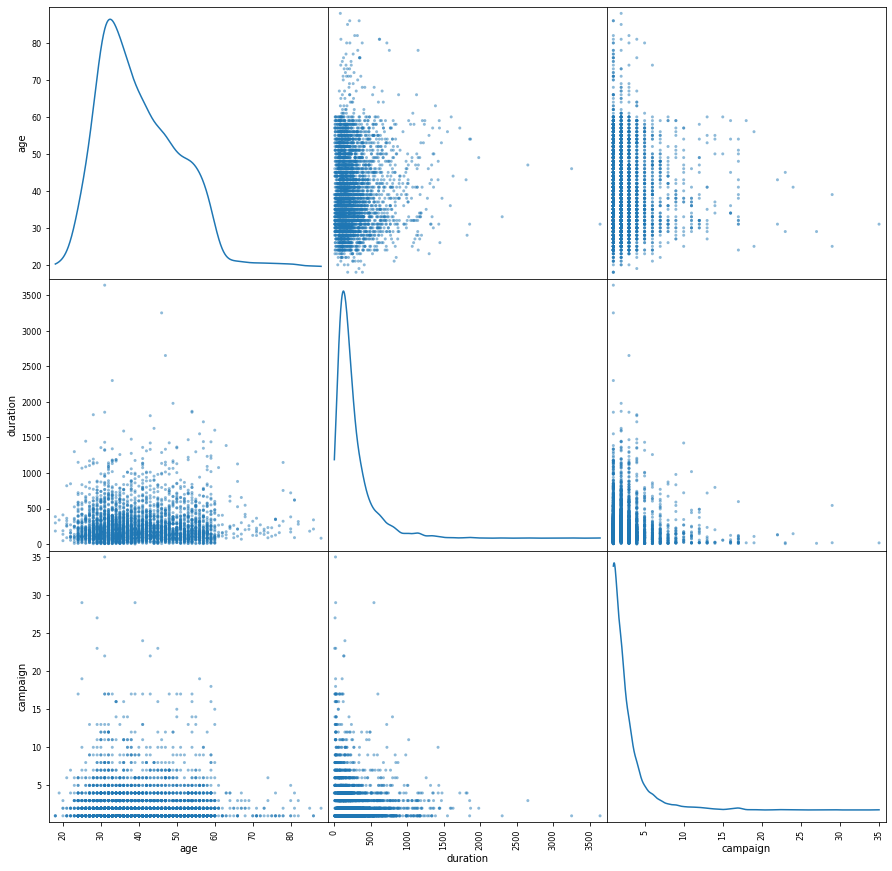

In [26]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other. The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the geometric distribution is more suitable.

Now We will build a separate histogram for age feature:

<AxesSubplot:>

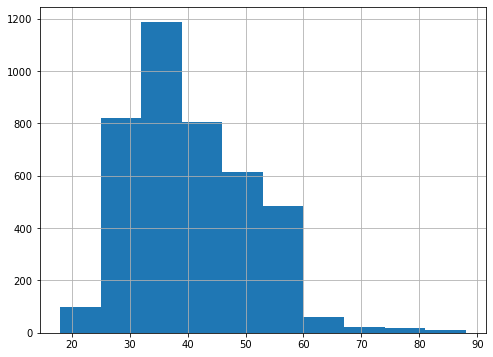

In [27]:
df["age"].hist()

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

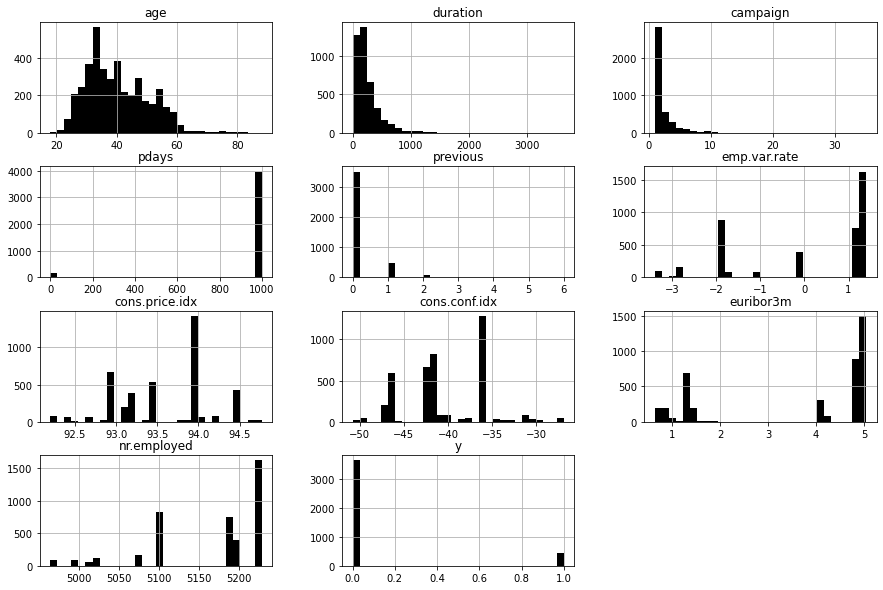

In [31]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.

Now we will use Box Plot. It will allow us to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).

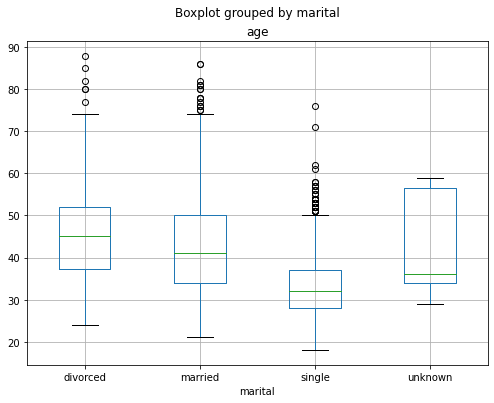

In [32]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

The plot shows that unmarried people are on average younger than divorced and married ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.

# Now we will try to do this by data grouping on other features:

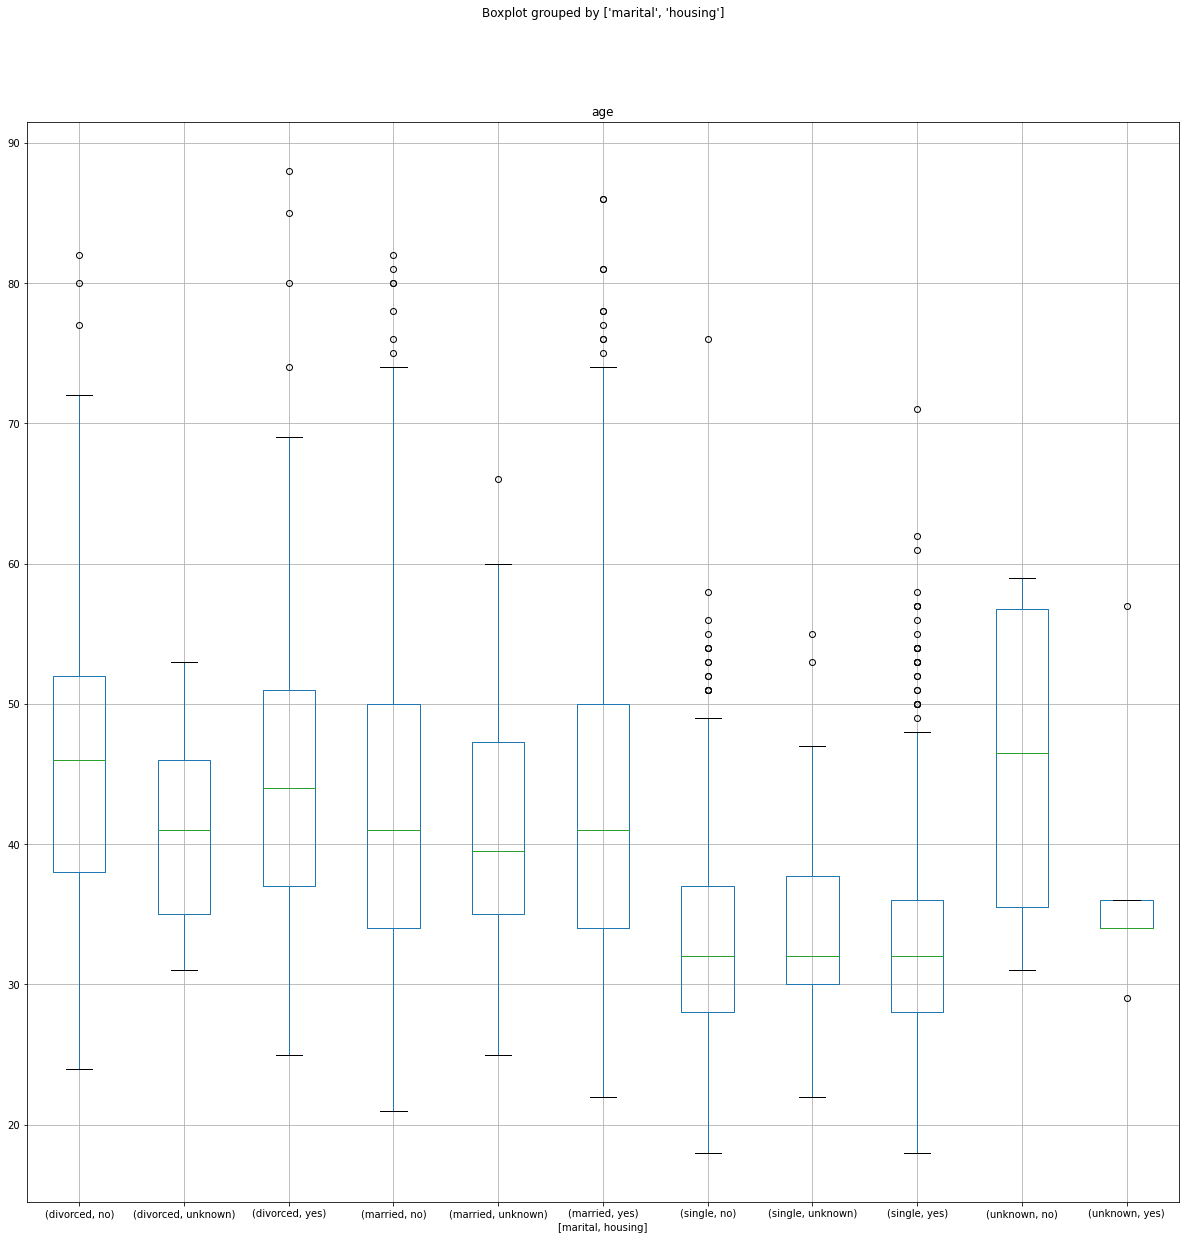

In [33]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 20))
plt.show()

# Tasks
In this section, we will solve some tasks with the source bank dataset.

# Question 1
List of 10 clients with the largest number of contacts.

In [34]:
df.sort_values(by = "campaign", ascending = False).head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2552,31,services,single,high.school,no,no,no,cellular,jul,thu,...,35,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3564,25,admin.,single,basic.9y,no,no,no,cellular,jul,thu,...,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3241,39,services,married,high.school,no,yes,no,cellular,jul,thu,...,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
56,29,admin.,single,university.degree,no,yes,no,telephone,jun,fri,...,27,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2485,41,technician,married,high.school,no,yes,no,telephone,jun,fri,...,24,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2988,45,services,married,professional.course,no,yes,no,cellular,jul,mon,...,23,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2202,29,technician,married,university.degree,no,no,no,cellular,jul,thu,...,23,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
713,43,admin.,married,high.school,no,yes,no,cellular,jul,mon,...,22,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
3569,31,admin.,single,high.school,no,no,no,telephone,may,thu,...,22,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
886,56,technician,married,university.degree,unknown,no,no,cellular,jul,mon,...,19,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0


# Question 2
Determine the median age and the number of contacts for different levels of client education.

In [35]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)

mean           count         
                           age  campaign   age campaign
education                                              
basic.4y             47.657343  2.421911   429      429
basic.6y             40.144737  2.649123   228      228
basic.9y             39.231707  2.348432   574      574
high.school          38.097720  2.630836   921      921
illiterate           42.000000  4.000000     1        1
professional.course  40.207477  2.512150   535      535
university.degree    39.017405  2.583070  1264     1264
unknown              42.826347  2.538922   167      167

# Question 3
Output box plot to analyze the client age distribution by their education level.

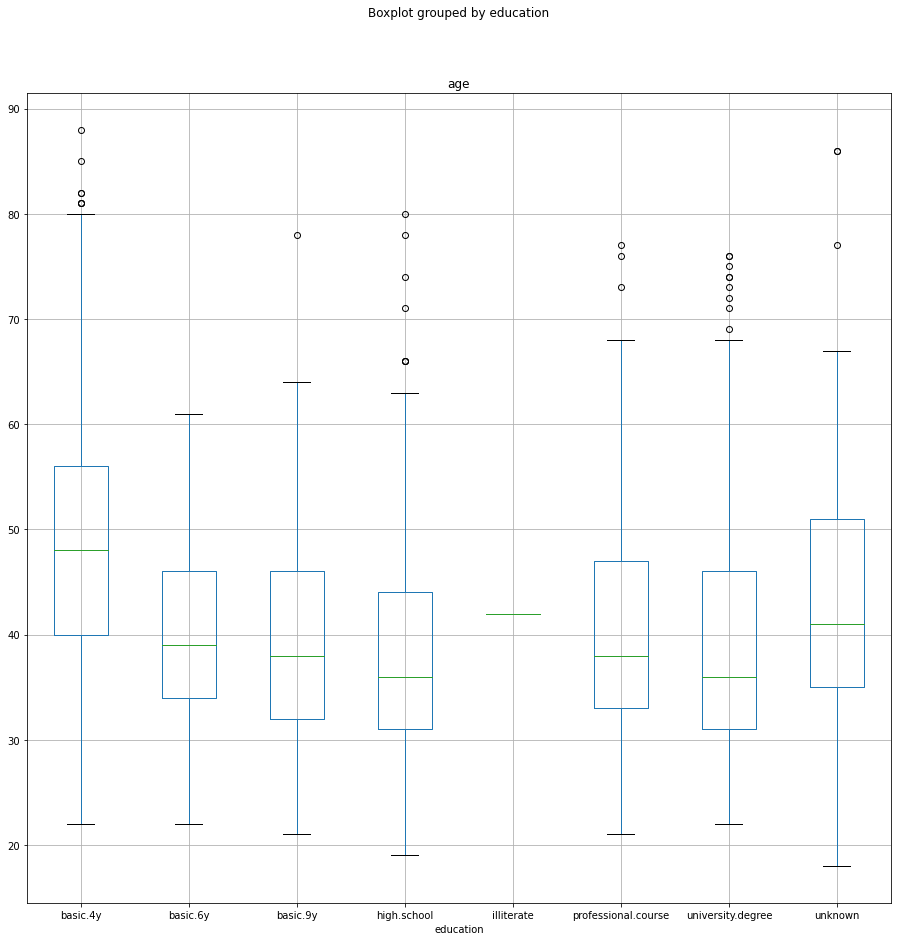

In [36]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()